In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Asymmetric S21 resonance model
# -----------------------------
def S21_asym(f, f0, k, amp, phi):
    val = amp * np.exp(1j*phi) / (1 + 1j*2*(f - f0)/k)
    return np.abs(val)

# -----------------------------
# Initial guess
# -----------------------------
def initial_guess(f, s21_mag):
    amp = np.max(s21_mag)
    f0 = f[np.argmax(s21_mag)]
    half_max = amp / 2
    indices = np.where(s21_mag >= half_max)[0]
    k = f[indices[-1]] - f[indices[0]] if len(indices) >= 2 else (f[-1]-f[0])/10
    phi = 0.0   # start with 0 phase
    return [f0, k, amp, phi]

# -----------------------------
# Fit and plot function
# -----------------------------
def fit_and_plot_linear(file_path, f_start, f_end):
    # Read CSV
    df = pd.read_csv(file_path)
    mag = df['Magnitude_abs'].values
    phase_deg = df['Phase_deg'].values

    # Frequency array
    f = np.linspace(f_start, f_end, len(mag))

    # Initial guess
    p0 = initial_guess(f, mag)

    # Curve fit
    popt, pcov = curve_fit(S21_asym, f, mag, p0=p0)

    # Fitted curve
    f_dense = np.linspace(f[0], f[-1], 1000)
    mag_fit = S21_asym(f_dense, *popt)

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(f, mag, 'o', markersize=4, label='Data')
    plt.plot(f_dense, mag_fit, '-', color='black', label='Asymmetric Fit')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21|')
    plt.title(file_path.split('\\')[-1])
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Fit parameters: f0={popt[0]:.3e}, k={popt[1]:.3e}, amp={popt[2]:.3e}, phi={popt[3]:.3f}")
    return popt

# -----------------------------
# CSV files with correct frequency ranges
# -----------------------------
csv_files_with_range = [
    # 4–8 GHz files
    (r"C:\Users\PRACHI TYAGI\Downloads\s21_results_pow0_BD_1Kz_4-8.csv", 4e9, 8e9),
    (r"C:\Users\PRACHI TYAGI\Downloads\s21_results_pow-40_BD_1Kz_4-8.csv", 4e9, 8e9),
    (r"C:\Users\PRACHI TYAGI\Downloads\s21_results_pow-55_BD_1Kz_4-8.csv", 4e9, 8e9),

    # 5.5–6.5 GHz files
    (r"C:\Users\PRACHI TYAGI\Downloads\s21_results_pow0_BD_1Kz_5dot5-6dot5.csv", 5.5e9, 6.5e9),
    (r"C:\Users\PRACHI TYAGI\Downloads\s21_results_pow-40_BD_1Kz_5dot5-6dot5.csv", 5.5e9, 6.5e9),
    (r"C:\Users\PRACHI TYAGI\Downloads\s21_results_pow-55_BD_1Kz_5dot5-6dot5.csv", 5.5e9, 6.5e9)
]

# -----------------------------
# Generate plots for all files
# -----------------------------
for file_path, f_start, f_end in csv_files_with_range:
    fit_and_plot_linear(file_path, f_start, f_end)

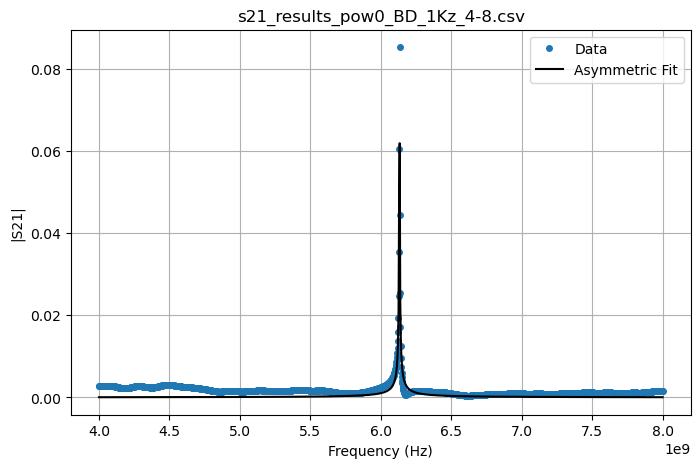

Fit parameters: f0=6.133e+09, k=3.179e+06, amp=8.733e-02, phi=96940071.468


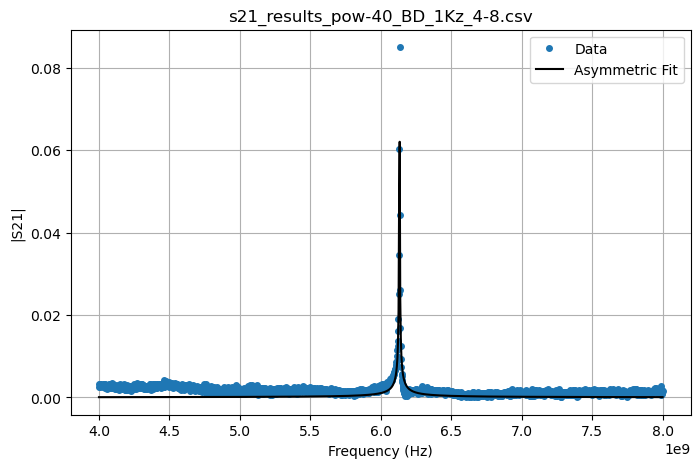

Fit parameters: f0=6.133e+09, k=3.229e+06, amp=8.663e-02, phi=33104404.771


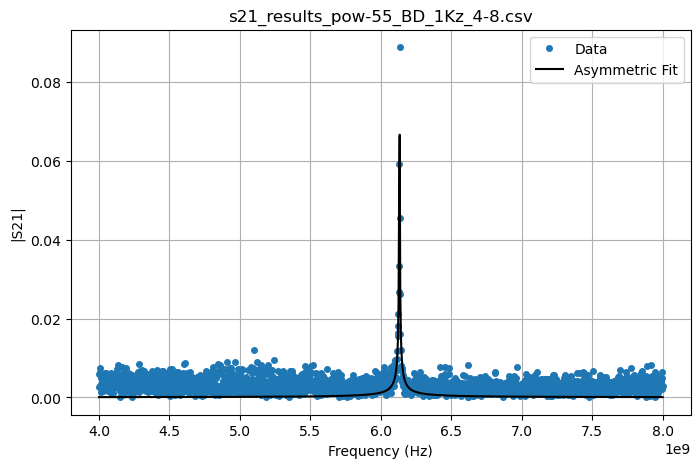

Fit parameters: f0=6.133e+09, k=3.885e+06, amp=8.419e-02, phi=34839661.918


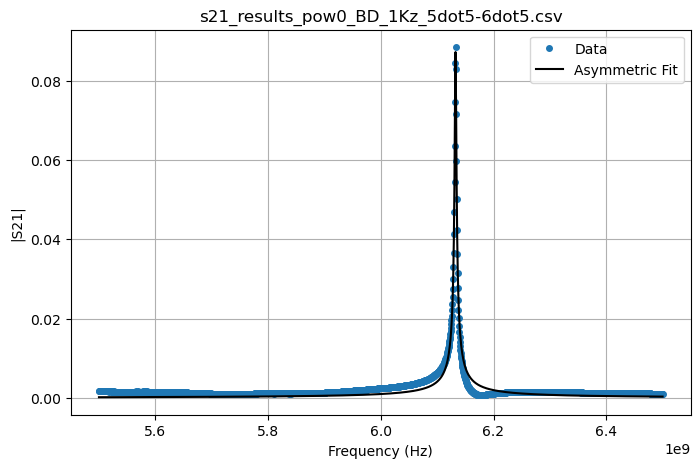

Fit parameters: f0=6.133e+09, k=3.092e+06, amp=8.719e-02, phi=-845010295.075


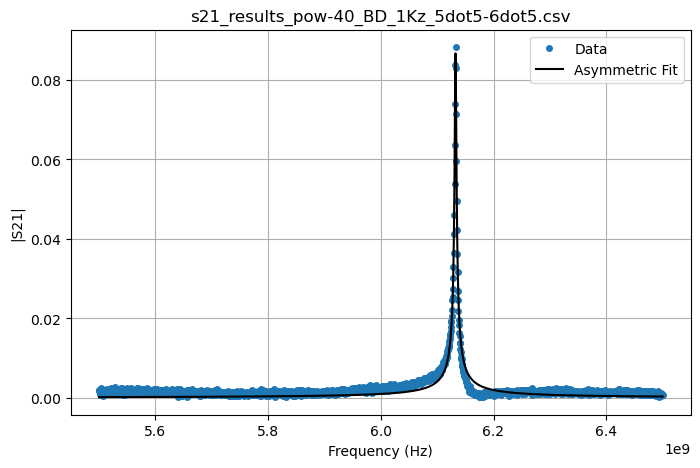

Fit parameters: f0=6.133e+09, k=3.111e+06, amp=8.668e-02, phi=1201759373.420


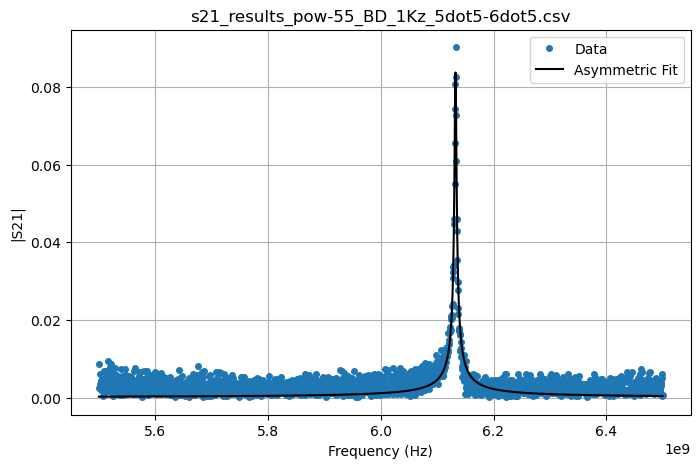

Fit parameters: f0=6.133e+09, k=3.556e+06, amp=8.378e-02, phi=215404430.644
